In [1]:
##section1 Clean and explore the dataset

In [2]:
import pandas as pd
import numpy as nu
import seaborn as sns
import numpy as np

In [3]:
##read data
df = pd.read_csv("https://comoto-interview-data.s3.amazonaws.com/ecommerce_data.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
 8   channel      541909 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 37.2+ MB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,channel
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,Email
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Email
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,Email
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Email
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Email


In [4]:
## convert data into proper format
df['InvoiceDate']=pd.to_datetime(df.InvoiceDate)
df['channel']=df['channel'].astype('category')
df['Country']=df['Country'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  category      
 8   channel      541909 non-null  category      
dtypes: category(2), datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 30.0+ MB


In [5]:
## For this dataset NA value is acceptable for most of the columns except for "Quantity", "Unit Price" and "Customer ID"
print("CustomerID with NA:",df['CustomerID'].isnull().any().any())
print("UnitPrice with NA:",df['UnitPrice'].isnull().any().any())
print("Quantity with NA:",df['Quantity'].isnull().any().any())

## we have to check why there is NA Customer ID and look in detail if it will affect our analysis

CustomerID with NA: True
UnitPrice with NA: False
Quantity with NA: False


In [6]:
df[df['CustomerID'].isnull()].head(20)

## a lot of observations have NA customerID, since we want to define customer clusters and predict furture purchase
## observations without customerID is not useable for us

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,channel
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom,Email
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom,Email
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom,Email
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom,Email
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom,Email
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,NaN,United Kingdom,Email
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom,Email
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,2010-12-01 14:32:00,0.43,NaN,United Kingdom,Email
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,2010-12-01 14:32:00,0.43,NaN,United Kingdom,Email
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,2010-12-01 14:32:00,0.43,NaN,United Kingdom,Email


In [7]:
##we should delete these observations and convert this column to category type
df=df.dropna(how='any',subset=['CustomerID'])
print("CustomerID with NA:",df['CustomerID'].isnull().any().any())
df['CustomerID']=df['CustomerID'].astype(int).astype('category')

CustomerID with NA: False


In [8]:
## we create new column named"Total price" to calculate the total price per purchase
df['Total price']=df['UnitPrice']*df['Quantity']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,channel,Total price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,Email,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Email,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,Email,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Email,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Email,20.34


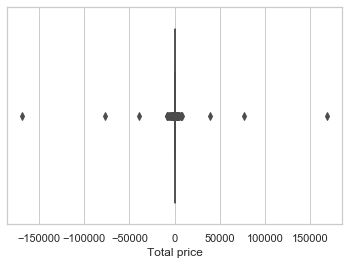

In [9]:
#check the range of Total price and see if there is outliner and negative value in the data
sns.set(style="whitegrid") 
ax1 = sns.boxplot("Total price", data=df)


In [10]:
## negative value

In [11]:
## it can be observed from the plot above that the Total price of some of the observations are negative.
df[df["Total price"] < 0]

## these negative purchase may be return or refund made by customers,we can see that
## these observations have same CustomerID but opposite total price,we will offset these values via grouping the data by 
## CustomerID and sum Total price


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,channel,Total price
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom,Direct,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom,Email,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom,Direct,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,Direct,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,Direct,-6.96
...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom,Direct,-9.13
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom,Paid Social,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom,Email,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom,Paid Social,-1.25


In [12]:
customer=df.groupby(['CustomerID']).agg({'Total price': 'sum', 'Country': 'first','channel':'first'}).sort_values(by=['Total price'],ascending=[False])
print("number of customers",customer.shape[0])
customer.reset_index(inplace=True)
customer.head(800)

## we have 4,372 customers in total 

number of customers 4372


,CustomerID,Total price,Country,channel
0,14646,279489.02,Netherlands,Direct
1,18102,256438.49,United Kingdom,Direct
2,17450,187482.17,United Kingdom,Paid Social
3,14911,132572.62,EIRE,Paid Social
4,12415,123725.45,Australia,Email
...,...,...,...,...
795,16076,2173.53,United Kingdom,Paid Social
796,15811,2171.32,United Kingdom,Email
797,14341,2166.38,United Kingdom,Email
798,12856,2162.68,United Kingdom,Direct


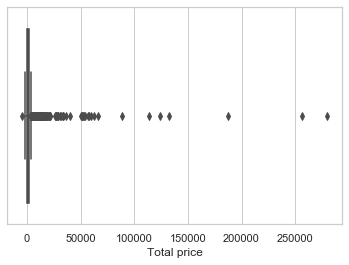

In [13]:
## check the range of total price of the grouped dataset
sns.set(style="whitegrid") 
ax1 = sns.boxplot("Total price", data=customer)

##there are still negative total price, but much fewer

In [14]:
print(customer[customer["Total price"] < 0])
customer=customer[customer["Total price"] > 0]
## these negative total purchase CustomerID is not useable for us, we can get rid of these value

     CustomerID   Total price         Country      channel
4329      18072 -5.506706e-14  United Kingdom       Direct
4330      12454 -5.684342e-14           Spain       Direct
4331      16995 -1.250000e+00  United Kingdom        Email
4332      14679 -2.550000e+00  United Kingdom       Direct
4333      16428 -2.950000e+00  United Kingdom        Email
4334      12943 -3.750000e+00  United Kingdom       Direct
4335      12505 -4.500000e+00           Italy       Direct
4336      12605 -7.500000e+00         Germany        Email
4337      16138 -7.950000e+00  United Kingdom  Paid Social
4338      16454 -8.150000e+00  United Kingdom  Paid Social
4339      17547 -1.180000e+01  United Kingdom  Paid Social
4340      12870 -1.490000e+01  United Kingdom        Email
4341      14777 -1.745000e+01  United Kingdom  Paid Social
4342      14119 -1.990000e+01  United Kingdom  Paid Social
4343      14627 -2.185000e+01  United Kingdom  Paid Social
4344      17820 -2.405000e+01  United Kingdom       Dire

In [15]:
## outliners

In [16]:
customer.sort_values(by=['Total price'],ascending=[False]).head(20)


##looks like these outliners are normal purchase, we shouldn't get rid of these outliners

,CustomerID,Total price,Country,channel
0,14646,279489.02,Netherlands,Direct
1,18102,256438.49,United Kingdom,Direct
2,17450,187482.17,United Kingdom,Paid Social
3,14911,132572.62,EIRE,Paid Social
4,12415,123725.45,Australia,Email
5,14156,113384.14,EIRE,Direct
6,17511,88125.38,United Kingdom,Direct
7,16684,65892.08,United Kingdom,Email
8,13694,62653.10,United Kingdom,Email
9,15311,59419.34,United Kingdom,Email


In [17]:
##explore the data

In [18]:
##check the cumulative percentage by invoiceNo,customerID, country and channel

invoice=df.groupby(['InvoiceNo']).agg({'Total price': 'sum', 'Country': 'first','InvoiceDate': 'first','channel': 'first','CustomerID': 'first'}).sort_values(by=['Total price'],ascending=[False])
invoice['Total price_cumulative_percentage'] = (invoice['Total price'].cumsum() / invoice['Total price'].sum()) * 100
print("number of invoice",invoice.shape[0])
invoice.head(25)

##there are 22190 purchases in total counted by the number of invoice

number of invoice 22190


,Total price,Country,InvoiceDate,channel,CustomerID,Total price_cumulative_percentage
InvoiceNo,,,,,,
581483,168469.60,United Kingdom,2011-12-09 09:15:00,Paid Social,16446,2.029738
541431,77183.60,United Kingdom,2011-01-18 10:01:00,Direct,12346,2.959654
556444,38970.00,United Kingdom,2011-06-10 15:28:00,Email,15098,3.429168
567423,31698.16,United Kingdom,2011-09-20 11:05:00,Email,17450,3.811071
556917,22775.93,Australia,2011-06-15 13:37:00,Paid Social,12415,4.085477
572209,22206.00,United Kingdom,2011-10-21 12:08:00,Direct,18102,4.353017
567381,22104.80,United Kingdom,2011-09-20 10:12:00,Email,17450,4.619338
563614,21880.44,Australia,2011-08-18 08:51:00,Paid Social,12415,4.882956
550461,21535.90,United Kingdom,2011-04-18 13:20:00,Direct,15749,5.142422


In [19]:
customer=invoice.groupby(['CustomerID']).agg({'Total price': 'sum', 'Country': 'first','channel':'first'}).sort_values(by=['Total price'],ascending=[False])
customer['Total price_cumulative_percentage'] = (customer['Total price'].cumsum() / customer['Total price'].sum()) * 100
customer['Frequency'] = invoice['CustomerID'].value_counts()
print("number of customers",customer.shape[0])
print("customer shopping frequency:",
      invoice['CustomerID'].value_counts())
customer.reset_index(inplace=True)
customer.head(800)


## we have more than 4,372 customers in total made these purchase, some of them are high frequent customers. 
## Top 800 customers(top 20%)contribute 72% of total sales.

number of customers 4372
customer shopping frequency: 14911    248
12748    224
17841    169
14606    128
13089    118
        ... 
12355      1
16461      1
15820      1
17859      1
16392      1
Name: CustomerID, Length: 4372, dtype: int64


,CustomerID,Total price,Country,channel,Total price_cumulative_percentage,Frequency
0,14646,279489.02,Netherlands,Email,3.367311,77
1,18102,256438.49,United Kingdom,Direct,6.456907,62
2,17450,187482.17,United Kingdom,Email,8.715710,55
3,14911,132572.62,EIRE,Email,10.312958,248
4,12415,123725.45,Australia,Paid Social,11.803614,26
...,...,...,...,...,...,...
795,16076,2173.53,United Kingdom,Direct,71.866075,11
796,15811,2171.32,United Kingdom,Email,71.892235,9
797,14341,2166.38,United Kingdom,Email,71.918336,9
798,12856,2162.68,United Kingdom,Email,71.944392,8


In [20]:
country=df.groupby(['Country']).agg({'Total price': 'sum'}).sort_values(by=['Total price'],ascending=[False])
country['Total price']=country['Total price'].round(decimals=2)
country['Total price_cumulative_percentage'] = (country['Total price'].cumsum() / country['Total price'].sum()) * 100
country

## United Kingdom has contributed more than 80% of the total sales. UK seems to be our major market

,Total price,Total price_cumulative_percentage
Country,,
United Kingdom,6767873.39,81.539997
Netherlands,284661.54,84.969627
EIRE,250285.22,87.985087
Germany,221698.21,90.656129
France,196712.84,93.026144
Australia,137077.27,94.677665
Switzerland,55739.40,95.349218
Spain,54774.58,96.009148
Belgium,40910.96,96.502047


In [21]:
##since UK accounts for 82.011638% of total sale, we also interested in cumulative percentage in UK
UK=df.loc[df['Country'] == 'United Kingdom']
UK=UK.groupby(['CustomerID']).agg({'Total price': 'sum', 'Country': 'first'}).sort_values(by=['Total price'],ascending=[False])
UK['Total price_cumulative_percentage'] = (UK['Total price'].cumsum() / UK['Total price'].sum()) * 100
print("number of customers",UK.shape[0])
UK.head(800)
## out of 4372 customers in total, 3950 of them are in United Kingdom,top 800 still contribute more than 73% of total sales in UK

number of customers 4372


,Total price,Country,Total price_cumulative_percentage
CustomerID,,,
18102,256438.49,United Kingdom,3.789056
17450,187482.17,United Kingdom,6.559234
17511,88125.38,United Kingdom,7.861347
16684,65892.08,United Kingdom,8.834948
13694,62653.10,United Kingdom,9.760691
...,...,...,...
16170,1880.42,United Kingdom,72.446313
16128,1880.22,United Kingdom,72.474094
17293,1875.11,United Kingdom,72.501800


In [22]:
channel=df.groupby(['channel']).agg({'Total price': 'sum'}).sort_values(by=['Total price'],ascending=[False])
channel['channel']=channel['Total price'].round(decimals=2)
channel['Total price_cumulative_percentage'] = (channel['Total price'].cumsum() / channel['Total price'].sum()) * 100
channel

## Direct,email and Paid social each account for more than 1/3 of total sales

,Total price,channel,Total price_cumulative_percentage
channel,,,
Direct,3192118.850,3192118.85,38.458958
Email,2490442.183,2490442.18,68.464048
Paid Social,2138045.931,2138045.93,94.223433
Influencer,479458.850,479458.85,100.000000


In [23]:
## check the range of invoicedate
print("oldest purchase:", min(df['InvoiceDate']),
      "latest purchase:", max(df['InvoiceDate']))

oldest purchase: 2010-12-01 08:26:00 latest purchase: 2011-12-09 12:50:00


In [24]:
## check the number of purchase each month
time=invoice.groupby(pd.Grouper(key='InvoiceDate',freq='1M')).size().to_frame(name = 'number of invoice')
time

,number of invoice
InvoiceDate,
2010-12-31,1708
2011-01-31,1236
2011-02-28,1202
2011-03-31,1619
2011-04-30,1384
2011-05-31,1849
2011-06-30,1707
2011-07-31,1593
2011-08-31,1544


In [25]:
##data clean and overview conclusion: 
## cleaning:
## we change the data into proper format,eliminate observations with  NA customer ID
## overview:
## 1.we have one year purchase record from 2010-12-01 to 2011-12-09.
## 2.the number of purchase reached the peak in last three months.
## 2.Within one year period, 4338 customers made 18,532 purchases in total. 
## 3.UK is our major market, 80% of the sale is contributed from UK.
## 4.top 20% customers contribute to almost 73% of the total sales.top customers are very important to company's revenue.

In [26]:
#section2 Define customer clusters using data-driven methods and describe them to a biz-crowd

In [27]:
## our plan is to cluster customer to four groups:
## 1.high frequency high total purchase 
## 2.low frequency high total purchase
## 3.high frequency low total purchase
## 4.low frequency low total purchase

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [29]:
##scale total price and keep only scaled total price and Frequency as our dependent variable for clustering
customer['Total price_scale']=preprocessing.scale(customer['Total price'])
customer['Frequency_scale']=preprocessing.scale(customer['Frequency'])
customer_scale=customer[['Total price_scale','Frequency_scale','CustomerID']]
customer_scale

,Total price_scale,Frequency_scale,CustomerID
0,33.776695,7.702606,14646
1,30.971950,6.096213,18102
2,22.581475,5.346562,17450
3,15.900185,26.015494,14911
4,14.823678,2.240868,12415
...,...,...,...
4367,-0.368011,-0.436455,12503
4368,-0.372792,-0.008083,17603
4369,-0.376066,-0.436455,14213
4370,-0.424772,-0.436455,15369


In [30]:
## k means clustering

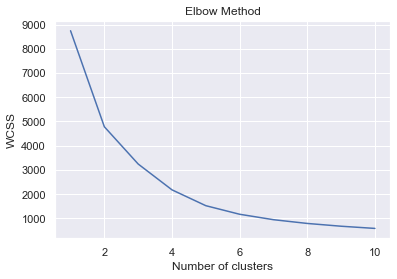

In [31]:
## double check if k=4 is reasonable
X=customer_scale.iloc[:, [0,1]]
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## 3,4 are at the elbow, we can use 4 as the number of centers

In [32]:
kmeans = KMeans(n_clusters=4, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
y_kmeans = kmeans.fit_predict(X)

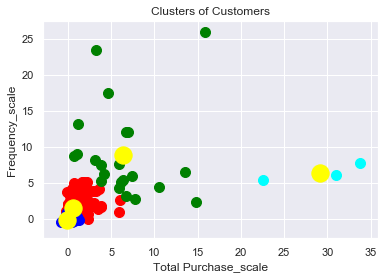

In [33]:
# Visualising the clusters
plt.scatter(X.iloc[y_kmeans==0, 0], X.iloc[y_kmeans==0, 1], s=100, c='red', label ='Cluster 0')
plt.scatter(X.iloc[y_kmeans==1, 0], X.iloc[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 1')
plt.scatter(X.iloc[y_kmeans==2, 0], X.iloc[y_kmeans==2, 1], s=100, c='green', label ='Cluster 2')
plt.scatter(X.iloc[y_kmeans==3, 0], X.iloc[y_kmeans==3, 1], s=100, c='cyan', label ='Cluster 3')
#Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Total Purchase_scale')
plt.ylabel('Frequency_scale')
plt.show()

## we can see from the plot below, customers have been grouped into 4, but Cluster 4 only has 3 customers, 
## seems we have 3 groups instead of 4.
## we can change the number of clusters to 3 and check the result.

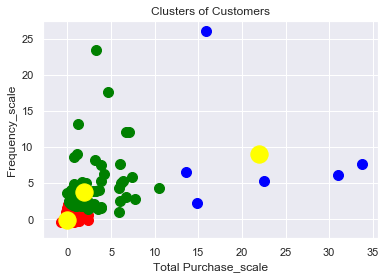

In [34]:
kmeans2 = KMeans(n_clusters=3, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
y_kmeans2 = kmeans2.fit_predict(X)
# Visualising the clusters
plt.scatter(X.iloc[y_kmeans2==0, 0], X.iloc[y_kmeans2==0, 1], s=100, c='red', label ='Cluster 0')
plt.scatter(X.iloc[y_kmeans2==1, 0], X.iloc[y_kmeans2==1, 1], s=100, c='blue', label ='Cluster 1')
plt.scatter(X.iloc[y_kmeans2==2, 0], X.iloc[y_kmeans2==2, 1], s=100, c='green', label ='Cluster 2')
#Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.
plt.scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Total Purchase_scale')
plt.ylabel('Frequency_scale')
plt.show()

## we can see from the plot below, customers have been grouped into 4, but Cluster 2 still only have few customers in it
## we better keep 4 clusters instead of 3

In [35]:
cluster_map = pd.DataFrame()
cluster_map['CustomerID']=customer_scale['CustomerID']
cluster_map['cluster'] = kmeans.labels_
cluster_map.groupby(['cluster']).count()

,CustomerID
cluster,
0,390
1,3957
2,22
3,3


In [36]:
## connect the cluster group with our original data and group all data by cluster to find reasonable explanation for each group
kmeans_group=pd.merge(left=customer_scale,right=cluster_map,left_on=customer_scale['CustomerID'], right_on=['CustomerID'])
customer_kmeans=kmeans_group.groupby(['cluster']).agg({'Total price_scale': "median",'Frequency_scale': "median"}).sort_values(by=['Total price_scale'],ascending=[False])
customer_kmeans

##Conclusion:
## For Cluster3, it is obvious that the customers in the group are customers with high frequency and top total purchase. 
## they are obviously our premium customers who contribute the most to the total purchase. but since there are only 3 customers
## in this group, we can probably group them toghether with customers in cluster2

## For Cluster2, we can see that the customers' frequency are highest.Although the median of total purchase in this group is
## lower than that in cluser3, there are more customers in this group and they still contribute a lot to the total purchase.
## we can label customer in Cluster 3 and 2 as 1st rank customers

## For Cluster0, customers in this group have low total purchase and frequency but both figures are still positive.
## this is the group most of the customers are in. we can label them as 2nd rank customers
## For Cluster1, customers in that group have lowest frequency and total purchase.
## Customers in this group maybe the customers with return or refund. we can label them as 3rd rank customers

,Total price_scale,Frequency_scale
cluster,,
3,30.971950,6.096213
2,6.080652,7.006502
0,0.383958,1.169939
1,-0.161596,-0.329362


In [37]:
##section3:Predict whether the customer will purchase again in the future 3 months 
##(you can use the last 3 months of data as your test set)

In [38]:
## we plan to find the probability that if customers will come back for shopping in future 3 months, we have to perform 
## feature selection and group customer by 3 months to build the models

In [39]:
##calculate customers' total purchase and frequency with 1 month' interval
customer_churn_1=invoice.set_index('InvoiceDate').groupby('CustomerID').resample('M').size().to_frame(name = 'Frequency')
customer_churn_2=invoice.set_index('InvoiceDate').groupby('CustomerID').resample('M').sum()['Total price']
customer_info=customer[['CustomerID','Country','channel']]
customer_info=customer_info.set_index('CustomerID')
customer_churn=pd.merge(left=customer_churn_1,right=customer_churn_2,left_index=True, right_index=True)
customer_data_origin=pd.merge(left=customer_churn,right=customer_info,left_index=True, 
                      right_index=True,how='left')
customer_data_origin.reset_index(inplace=True)
customer_data_origin

,CustomerID,InvoiceDate,Frequency,Total price,Country,channel
0,12346,2011-01-31,2,0.00,United Kingdom,Direct
1,12347,2010-12-31,1,711.79,Iceland,Email
2,12347,2011-01-31,1,475.39,Iceland,Email
3,12347,2011-02-28,0,0.00,Iceland,Email
4,12347,2011-03-31,0,0.00,Iceland,Email
...,...,...,...,...,...,...
23432,18287,2011-06-30,0,0.00,United Kingdom,Direct
23433,18287,2011-07-31,0,0.00,United Kingdom,Direct
23434,18287,2011-08-31,0,0.00,United Kingdom,Direct
23435,18287,2011-09-30,0,0.00,United Kingdom,Direct


In [40]:
def func(x):
    if  x >0:
        return 1
    else :
        return 0

In [41]:
## create 4 binary columns to mark if customers come back to purchase in every 3 months
first_3_month=['2010-12-31','2011-01-31','2011-02-28']
second_3_month=['2011-03-31','2011-04-30','2011-05-31']
third_3_month=['2011-06-30','2011-07-31','2011-08-31']
fouth_3_month=['2011-09-30','2011-10-31','2011-11-30']
customer_data=pd.DataFrame(customer_data_origin)
customer_data['come_ 1st_3 months']=customer_data.loc[customer_data['InvoiceDate'].isin(first_3_month)]['Frequency'].apply(func)
customer_data['come_ 1st_3 months']=customer_data['come_ 1st_3 months'].fillna(0)
customer_data['come_ 2nd_3 months']=customer_data.loc[customer_data['InvoiceDate'].isin(second_3_month)]['Frequency'].apply(func)
customer_data['come_ 2nd_3 months']=customer_data['come_ 2nd_3 months'].fillna(0)
customer_data['come_ 3rd_3 months']=customer_data.loc[customer_data['InvoiceDate'].isin(third_3_month)]['Frequency'].apply(func)
customer_data['come_ 3rd_3 months']=customer_data['come_ 3rd_3 months'].fillna(0)
customer_data['come_ 4th_3 months']=customer_data.loc[customer_data['InvoiceDate'].isin(fouth_3_month)]['Frequency'].apply(func)
customer_data['come_ 4th_3 months']=customer_data['come_ 4th_3 months'].fillna(0)
customer_data

,CustomerID,InvoiceDate,Frequency,Total price,Country,channel,come_ 1st_3 months,come_ 2nd_3 months,come_ 3rd_3 months,come_ 4th_3 months
0,12346,2011-01-31,2,0.00,United Kingdom,Direct,1.0,0.0,0.0,0.0
1,12347,2010-12-31,1,711.79,Iceland,Email,1.0,0.0,0.0,0.0
2,12347,2011-01-31,1,475.39,Iceland,Email,1.0,0.0,0.0,0.0
3,12347,2011-02-28,0,0.00,Iceland,Email,0.0,0.0,0.0,0.0
4,12347,2011-03-31,0,0.00,Iceland,Email,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
23432,18287,2011-06-30,0,0.00,United Kingdom,Direct,0.0,0.0,0.0,0.0
23433,18287,2011-07-31,0,0.00,United Kingdom,Direct,0.0,0.0,0.0,0.0
23434,18287,2011-08-31,0,0.00,United Kingdom,Direct,0.0,0.0,0.0,0.0
23435,18287,2011-09-30,0,0.00,United Kingdom,Direct,0.0,0.0,0.0,0.0


In [42]:
customer_data2=customer_data.groupby(['CustomerID']).agg({'Total price': 'sum', 'Country': 'first','channel':'first',
                                                         'come_ 1st_3 months': 'max','come_ 2nd_3 months': 'max',
                                                          'come_ 3rd_3 months': 'max',
                                                          'come_ 4th_3 months': 'max'})
customer_data2['channel']=customer_data2['channel'].astype('category')
customer_data2['Country']=customer_data2['Country'].astype('category')
customer_data2.reset_index(inplace=True)
customer_data2

,CustomerID,Total price,Country,channel,come_ 1st_3 months,come_ 2nd_3 months,come_ 3rd_3 months,come_ 4th_3 months
0,12346,0.00,United Kingdom,Direct,1.0,0.0,0.0,0.0
1,12347,4310.00,Iceland,Email,1.0,1.0,1.0,1.0
2,12348,1797.24,Finland,Direct,1.0,1.0,0.0,1.0
3,12349,1757.55,Italy,Paid Social,0.0,0.0,0.0,1.0
4,12350,334.40,Norway,Direct,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
4367,18280,180.60,United Kingdom,Paid Social,0.0,1.0,0.0,0.0
4368,18281,80.82,United Kingdom,Paid Social,0.0,0.0,1.0,0.0
4369,18282,176.60,United Kingdom,Email,0.0,0.0,1.0,0.0
4370,18283,2094.88,United Kingdom,Direct,1.0,1.0,1.0,1.0


In [43]:
customer_data_final=pd.merge(left=customer_data_origin,right=customer_data2.iloc[:,[4,5,6,7]],left_on=customer_data_origin['CustomerID'], 
                      right_on=customer_data2['CustomerID'],how='left')
customer_data_final=pd.merge(left=customer_data_final.iloc[:,[1,2,5,6,7,8,9,10]],right=customer['Total price'],left_on=customer_data_final['CustomerID'], 
                      right_on=customer['CustomerID'],how='left')
customer_data_final['CustomerID']=customer_data_final['CustomerID'].astype('category')
customer_data_final['channel']=customer_data_final['channel'].astype('category')
customer_data_final['Country']=customer_data_final['Country'].astype('category')
customer_data_final

,key_0,CustomerID,InvoiceDate,Country,channel,come_ 1st_3 months,come_ 2nd_3 months,come_ 3rd_3 months,come_ 4th_3 months,Total price
0,12346,12346,2011-01-31,United Kingdom,Direct,1.0,0.0,0.0,0.0,0.00
1,12347,12347,2010-12-31,Iceland,Email,1.0,1.0,1.0,1.0,4310.00
2,12347,12347,2011-01-31,Iceland,Email,1.0,1.0,1.0,1.0,4310.00
3,12347,12347,2011-02-28,Iceland,Email,1.0,1.0,1.0,1.0,4310.00
4,12347,12347,2011-03-31,Iceland,Email,1.0,1.0,1.0,1.0,4310.00
...,...,...,...,...,...,...,...,...,...,...
23432,18287,18287,2011-06-30,United Kingdom,Direct,0.0,1.0,0.0,1.0,1837.28
23433,18287,18287,2011-07-31,United Kingdom,Direct,0.0,1.0,0.0,1.0,1837.28
23434,18287,18287,2011-08-31,United Kingdom,Direct,0.0,1.0,0.0,1.0,1837.28
23435,18287,18287,2011-09-30,United Kingdom,Direct,0.0,1.0,0.0,1.0,1837.28


In [44]:
## use multi-layer perceptron model to predict, we use 4th_3 months as our test data
import numpy as np
import scipy as sp 
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [45]:
##Data preparation
Train_month=['2010-12-31','2011-01-31','2011-02-28','2011-03-31','2011-04-30','2011-05-31','2011-06-30','2011-07-31','2011-08-31']
Test_month=['2011-09-30','2011-10-31','2011-11-30']
x_train=customer_data_final.loc[customer_data_final['InvoiceDate'].isin(Train_month)].iloc[:,[1,5,6,7,9]]
x_train=x_train.groupby(['CustomerID']).agg({'Total price': 'sum', 
                                                         'come_ 1st_3 months': 'max','come_ 2nd_3 months': 'max',
                                                          'come_ 3rd_3 months': 'max'
                                                          })
x_train=x_train.fillna(0)
y_train=customer_data_final.loc[customer_data_final['InvoiceDate'].isin(Train_month)].iloc[:,[1,8]]
y_train=y_train.groupby(['CustomerID']).agg({
                                                          'come_ 4th_3 months': 'max'})
y_train=y_train.fillna(0)
x_test=customer_data_final.loc[customer_data_final['InvoiceDate'].isin(Test_month)].iloc[:,[1,5,6,7,9]]
x_test=x_test.groupby(['CustomerID']).agg({'Total price': 'sum', 
                                                         'come_ 1st_3 months': 'max','come_ 2nd_3 months': 'max',
                                                          'come_ 3rd_3 months': 'max'
                                                          })
x_test=x_test.fillna(0)
y_test=customer_data_final.loc[customer_data_final['InvoiceDate'].isin(Test_month)].iloc[:,[1,8]]
y_test=y_test.groupby(['CustomerID']).agg({'come_ 4th_3 months': 'max'})  
y_test=y_test.fillna(0)
x_predict=customer_data2.iloc[:,[0,1,4,5,6]].set_index('CustomerID')
x_train

,Total price,come_ 1st_3 months,come_ 2nd_3 months,come_ 3rd_3 months
CustomerID,,,,
12346,0.00,1.0,0.0,0.0
12347,38790.00,1.0,1.0,1.0
12348,16175.16,1.0,1.0,0.0
12349,0.00,0.0,0.0,0.0
12350,334.40,1.0,0.0,0.0
...,...,...,...,...
18280,180.60,0.0,1.0,0.0
18281,80.82,0.0,0.0,1.0
18282,176.60,0.0,0.0,1.0


In [46]:
##predict with multi-layer perceptron model
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network  import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [47]:
##train the model

mlp = MLPClassifier()

# If your model is overfitting, you can also include alphas hyper-parameter; check documentation for more
# set the hyper parameter grid
hyper_parameter_space = {
    'hidden_layer_sizes': [(5,5,5), (3,2,3), (3,5), (10, 10)], # (50,50,50) means 3 layers, each having 5 nodes; add more nodes when working with larger data
    'activation': ['tanh', 'relu'],
    'learning_rate': ['constant','adaptive'], # adaptive learning rate updates when needed, in relationship with epochs (check documentation)
}

# set up the structure of the random grid search using mlp model; n_iter denotes how many models should be tried by randomly selecting hyper-parameters
mlp_gr_src = RandomizedSearchCV(mlp, hyper_parameter_space, n_iter = 5, cv = 10, random_state = 123, scoring = 'accuracy') # cv = cross-validation

# fit the ml (with random grid search) on the train data
mlp_gr_src.fit(X=x_train, y=y_train)


D:\Program Files\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Program Files\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Program Files\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Program Files\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:934: DataConversionWarning: A column-vecto

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                           batch_size='auto', beta_1=0.9,
                                           beta_2=0.999, early_stopping=False,
                                           epsilon=1e-08,
                                           hidden_layer_sizes=(100,),
                                           learning_rate='constant',
                                           learning_rate_init=0.001,
                                           max_fun=15000, max_iter=200,
                                           momentum=0.9, n_iter_no_change=10,
                                           nesterovs_momentum=True, power_t=0.5,
                                           rando...
                                           solver='adam', tol=0.0001,
                                           validation_fraction=0.1,
                                         

In [48]:
print(mlp_gr_src.best_score_) # this shows the mean cross validated accuracy
print(mlp_gr_src.best_params_) # this shows the set of the hyper-parameters (from random grid search) that give the highest accuracy on the cross-validated data
print(mlp_gr_src.best_estimator_) # this shows all the model hyper-parameters

0.8241298600879805
{'learning_rate': 'constant', 'hidden_layer_sizes': (5, 5, 5), 'activation': 'tanh'}
MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 5, 5), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


In [49]:
y_pred_train_prob=mlp_gr_src.predict_proba(X=x_train)  

In [50]:
# using the best model determined by the random grid search, do the predictions on the train data (output a probability)
y_pred_train_prob=mlp_gr_src.predict_proba(X=x_train)  
    # instead of predict_proba(), you could use predict():
        # this will output the predicted category directly; 
        # the model would still calculate probabilities, though it will automatically assume a threshold of 0.5;
y_pred_train_prob[0:10] # show the first 10 instances; the number in the second column shows how likely that instance is to be categorized as 'positive'

array([[0.98893012, 0.01106988],
       [0.42273362, 0.57726638],
       [0.42273362, 0.57726638],
       [0.98983988, 0.01016012],
       [0.42273362, 0.57726638],
       [0.42273362, 0.57726638],
       [0.42271952, 0.57728048],
       [0.42273362, 0.57726638],
       [0.42273362, 0.57726638],
       [0.42273362, 0.57726638]])

Text(0, 0.5, 'Number of instances')

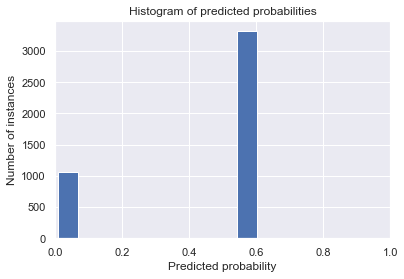

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt

# histogram of predicted probabilities
plt.hist(y_pred_train_prob[:, 1]) # plot the probabilities in the second column (index 1)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability')
plt.ylabel('Number of instances')

0.5928736520917764


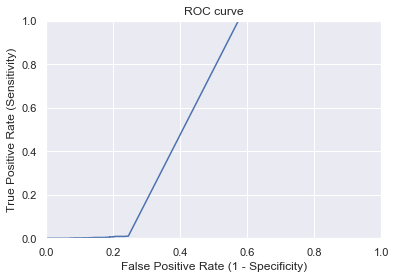

In [52]:
from sklearn import metrics

print(metrics.roc_auc_score(y_train, y_pred_train_prob[:, 1]))
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_pred_train_prob[:, 1])
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [53]:
from sklearn.preprocessing import binarize

y_pred_train_class = binarize([y_pred_train_prob[:, 1]], 0.5)[0]
y_pred_train_class

array([0., 1., 1., ..., 1., 1., 1.])

In [54]:
from sklearn.metrics import confusion_matrix

print(metrics.classification_report(y_train, y_pred_train_class))

print("Confusion Matrix:")
conf_mat_train = confusion_matrix(y_true=y_train, y_pred=y_pred_train_class)
print(conf_mat_train)

TP = conf_mat_train[1,1]  # you can calculate other performance metrics by using the confusion matrix results
print("True Positives:", TP)
TN = conf_mat_train[0,0]
print("True Negatives:", TN)
FP = conf_mat_train[0,1]
print("False Positives:", FP)
FN = conf_mat_train[1,0]
print("False Negatives:", FN)

print("Accuracy:", metrics.accuracy_score(y_train, y_pred_train_class))

              precision    recall  f1-score   support

         0.0       1.00      0.43      0.60      2471
         1.0       0.57      1.00      0.73      1901

    accuracy                           0.68      4372
   macro avg       0.79      0.71      0.66      4372
weighted avg       0.81      0.68      0.65      4372

Confusion Matrix:
[[1054 1417]
 [   2 1899]]
True Positives: 1899
True Negatives: 1054
False Positives: 1417
False Negatives: 2
Accuracy: 0.6754345837145471


In [55]:
##test model with test data

In [56]:
y_pred_test_prob=mlp_gr_src.predict_proba(X=x_test) 
y_pred_test_prob[0:10]

array([[0.98983988, 0.01016012],
       [0.42273362, 0.57726638],
       [0.42273362, 0.57726638],
       [0.42273362, 0.57726638],
       [0.98983988, 0.01016012],
       [0.42273362, 0.57726638],
       [0.98983988, 0.01016012],
       [0.98983988, 0.01016012],
       [0.98983988, 0.01016012],
       [0.42273362, 0.57726638]])

0.9749666898792944


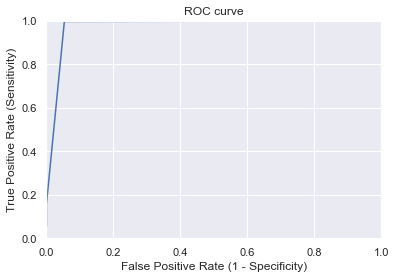

In [57]:
from sklearn import metrics

print(metrics.roc_auc_score(y_test, y_pred_test_prob[:, 1]))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_test_prob[:, 1])
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [58]:
y_pred_test_class = binarize([y_pred_test_prob[:, 1]])[0]

print(metrics.classification_report(y_test, y_pred_test_class))

print("Confusion Matrix:")
conf_mat_test = confusion_matrix(y_true=y_test, y_pred=y_pred_test_class)
print(conf_mat_test)

TP = conf_mat_test[1,1]  # you can calculate other performance metrics by using the confusion matrix results
print("True Positives:", TP)
TN = conf_mat_test[0,0]
print("True Negatives:", TN)
FP = conf_mat_test[0,1]
print("False Positives:", FP)
FN = conf_mat_test[1,0]
print("False Negatives:", FN)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred_test_class))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      1500
         1.0       0.66      1.00      0.79      2872

    accuracy                           0.66      4372
   macro avg       0.33      0.50      0.40      4372
weighted avg       0.43      0.66      0.52      4372

Confusion Matrix:
[[   0 1500]
 [   0 2872]]
True Positives: 2872
True Negatives: 0
False Positives: 1500
False Negatives: 0
Accuracy: 0.656907593778591


D:\Program Files\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
## predict with model
y_pred_test_prob=mlp_gr_src.predict_proba(X=x_predict)
y_pred_test_class = binarize([y_pred_test_prob[:, 1]], 0.5)[0]

customer_data2['if customer shall come in future 3 month']=y_pred_test_class
print(customer_data2['if customer shall come in future 3 month'].value_counts())
customer_data2
## from the prediction, we can see that most of the customers will come back to shop in future 3 months

1.0    4315
0.0      57
Name: if customer shall come in future 3 month, dtype: int64


,CustomerID,Total price,Country,channel,come_ 1st_3 months,come_ 2nd_3 months,come_ 3rd_3 months,come_ 4th_3 months,if customer shall come in future 3 month
0,12346,0.00,United Kingdom,Direct,1.0,0.0,0.0,0.0,0.0
1,12347,4310.00,Iceland,Email,1.0,1.0,1.0,1.0,1.0
2,12348,1797.24,Finland,Direct,1.0,1.0,0.0,1.0,1.0
3,12349,1757.55,Italy,Paid Social,0.0,0.0,0.0,1.0,1.0
4,12350,334.40,Norway,Direct,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
4367,18280,180.60,United Kingdom,Paid Social,0.0,1.0,0.0,0.0,1.0
4368,18281,80.82,United Kingdom,Paid Social,0.0,0.0,1.0,0.0,1.0
4369,18282,176.60,United Kingdom,Email,0.0,0.0,1.0,0.0,1.0
4370,18283,2094.88,United Kingdom,Direct,1.0,1.0,1.0,1.0,1.0
